In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')



import os
print(os.listdir("."))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['.git', '.ipynb_checkpoints', 'code-Copy1.ipynb', 'code.ipynb', 'converion to tflite.ipynb', 'model.pb', 'sample_submission.csv', 'submit1.csv', 'submit2.csv', 'test.csv', 'train.csv']


In [2]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
Y_train=train["label"]
X_train=train.drop(labels = ["label"],axis = 1)

In [5]:
X_train=X_train/255
test=test/255

In [6]:
X_train.shape
X_train=X_train.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

In [7]:
x_train,x_val,y_train,y_val=train_test_split(X_train, Y_train, test_size = 0.3, random_state = 2)

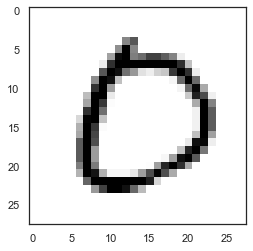

In [8]:
plt.imshow(x_train[9][:,:,0],cmap="gray_r")

In [9]:
model=Sequential()
model.add(Conv2D(input_shape=(28,28,1),filters=32,kernel_size=(5,5),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(1,1),activation="relu"))
model.add(MaxPool2D(pool_size=(1,1), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)    

In [10]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer,loss = "categorical_crossentropy",metrics=["accuracy"])

learn_rate= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [11]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

In [12]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=86),
                              epochs = 12, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // 86
                              , callbacks=[learn_rate])

Instructions for updating:
Use tf.cast instead.
Epoch 1/12
488/488 [==============================] - 49s 101ms/step - loss: 0.6993 - acc: 0.7684 - val_loss: 0.1041 - val_acc: 0.9694
Epoch 2/12
488/488 [==============================] - 46s 95ms/step - loss: 0.1854 - acc: 0.9456 - val_loss: 0.0698 - val_acc: 0.9785
Epoch 3/12
488/488 [==============================] - 47s 96ms/step - loss: 0.1315 - acc: 0.9623 - val_loss: 0.0466 - val_acc: 0.9862
Epoch 4/12
488/488 [==============================] - 69s 141ms/step - loss: 0.1064 - acc: 0.9700 - val_loss: 0.0557 - val_acc: 0.9849
Epoch 5/12
488/488 [==============================] - 61s 125ms/step - loss: 0.0961 - acc: 0.9732 - val_loss: 0.0552 - val_acc: 0.9830
Epoch 6/12
488/488 [==============================] - 57s 117ms/step - loss: 0.0885 - acc: 0.9757 - val_loss: 0.0540 - val_acc: 0.9843

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/12
488/488 [==============================] - 57s 117ms

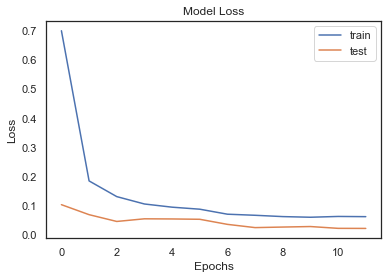

In [13]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

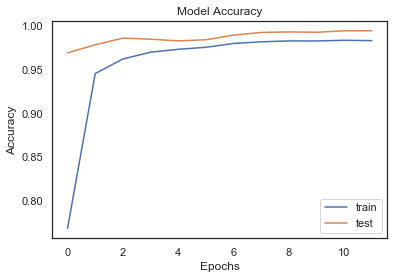

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [20]:
model.save('model.hdh5')

In [21]:
model.save('model.pb')

In [17]:
model_path="d:\datasets\MNIST"

In [18]:
tf.contrib.saved_model.save_keras_model(model,model_path)

TypeError: save_weights() got an unexpected keyword argument 'save_format'